<a href="https://colab.research.google.com/github/PrasoonPratham/Kaggle/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My solution for the MNIST dataset.


---
![MNIST Dataset](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png)

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

Source : [Kaggle](https://www.kaggle.com/c/digit-recognizer)


> In this notebook I will attempt to make a machine learning model for the MNIST dataset.

You can follow me on Twitter : [@PrasoonPratham](https://twitter.com/PrasoonPratham)

In [33]:
!pip install kaggle
api_token = {"username":"prathamprasoon","key":"4eec6bdf09208b0e38d6f39fcec31bde"}
import json
import zipfile
import os
!mkdir /root/.kaggle
!mkdir /content/competitions/digit-recognizer
!echo '{"username":"USERNAME","key":"API_KEY"}' > /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!kaggle competitions download -c digit-recognizer

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘/content/competitions/digit-recognizer’: File exists
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 56.2MB/s]
 55% 5.00M/9.16M [00:00<00:00, 14.1MB/s]
100% 9.16M/9.16M [00:00<00:00, 20.7MB/s]
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
%%bash
mkdir /content/competitions/digit-recognizer

mkdir: cannot create directory ‘/content/competitions/digit-recognizer’: File exists


In [35]:
%%bash
mv /content/competitions/digit-recognizer/train.csv.zip /content/competitions/digit-recognizer/traincsv.zip
mv /content/competitions/digit-recognizer/test.csv.zip /content/competitions/digit-recognizer/testcsv.zip

In [36]:
zip_ref = zipfile.ZipFile('/content/competitions/digit-recognizer/traincsv.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [37]:
zip_ref = zipfile.ZipFile('/content/competitions/digit-recognizer/testcsv.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [38]:
import pandas as pd
test_data = pd.read_csv('/content/competitions/digit-recognizer/test.csv')
train_data = pd.read_csv('/content/competitions/digit-recognizer/train.csv')

In [39]:
import numpy as np
import seaborn as sns
import tensorflow as tf

In [40]:
Y_train = train_data["label"]

# Drop 'label' column
X_train = train_data.drop(labels = ["label"],axis = 1) 

In [41]:
X_train = X_train/255.0
test_data = test_data/255.0

X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [44]:
from sklearn.model_selection import train_test_split

X1_train,Y1_train,X2_train,Y2_train=train_test_split(X_train,Y_train,test_size = 0.1, random_state=2)

In [65]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),                      
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [72]:
model.fit(X1_train, X2_train, epochs=15)

Epoch 1/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0059 - accuracy: 0.9987
Epoch 2/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0077 - accuracy: 0.9986
Epoch 3/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0052 - accuracy: 0.9988
Epoch 4/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.9981
Epoch 5/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0082 - accuracy: 0.9986
Epoch 6/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0061 - accuracy: 0.9988
Epoch 7/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0066 - accuracy: 0.9991
Epoch 8/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0061 - accuracy: 0.9989
Epoch 9/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0045 - accuracy: 0.9989
Epoch 10/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.011

In [73]:
results = model.evaluate(Y1_train, Y2_train, batch_size=32)

132/132 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.9814


In [74]:
print("Fit model on training data")
history = model.fit(
    X1_train,
    X2_train,
    batch_size=32,
    epochs=9,
    validation_data=(Y1_train, Y2_train),
)

Fit model on training data
Epoch 1/9
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0083 - accuracy: 0.9983 - val_loss: 0.3813 - val_accuracy: 0.9814
Epoch 2/9
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0106 - accuracy: 0.9985 - val_loss: 0.3855 - val_accuracy: 0.9812
Epoch 3/9
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 0.3407 - val_accuracy: 0.9840
Epoch 4/9
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.4359 - val_accuracy: 0.9798
Epoch 5/9
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0152 - accuracy: 0.9981 - val_loss: 0.3706 - val_accuracy: 0.9829
Epoch 6/9
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0057 - accuracy: 0.9989 - val_loss: 0.3708 - val_accuracy: 0.9831
Epoch 7/9
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0064 - accuracy: 0.9988 - val_loss: 0.

<Figure size 432x288 with 0 Axes>

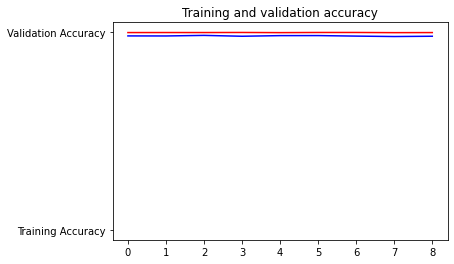

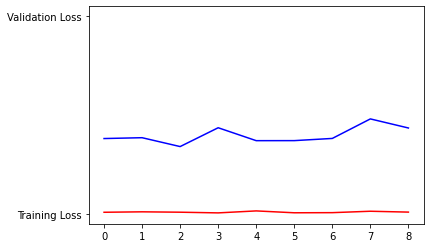

<Figure size 432x288 with 0 Axes>

In [75]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [77]:
predicted_classes = model.predict_classes(test_data)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("submission.csv", index=False, header=True)